In [54]:
import kwant
from matplotlib import pyplot

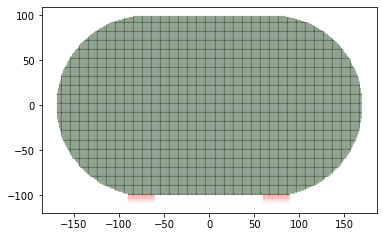

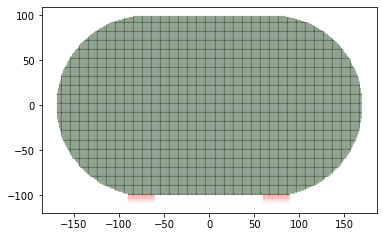

In [59]:
syst= kwant.Builder()
lat= kwant.lattice.square()

def stadium(pos):                      # define shape
    x,y= pos
    x= max(abs(x)-70,0)
    
    return x**2 + y**2 < 100**2        

syst[lat.shape(stadium, (0, 0))] = 4   # onsite potential added
syst[lat.neighbors()]= -1              # hopping added

lead_symm= kwant.TranslationalSymmetry([0,-1])      # attach lead
for left_lead,right_lead in [(-90,-60),(60,90)]:
    lead= kwant.Builder(lead_symm)
    lead[(lat(x,0) for x in range (left_lead,right_lead))]=4
    lead[lat.neighbors()]= -1
    syst.attach_lead(lead)
    
kwant.plot(syst, num_lead_cells=10, site_color='green')



In [60]:
sys = syst.finalized()

In [20]:
energy=[]

for i in range(100):
    energy.append(0.5 + 0.02 * i)
    


In [22]:
cond=[]
for en in energy:
    cond.append(kwant.smatrix(sys,en).transmission(1,0))

In [24]:
local_dos= kwant.ldos(sys,energy=2)

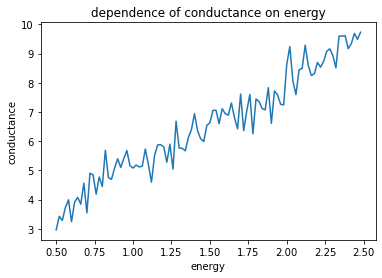

In [61]:
from matplotlib import pyplot
pyplot.plot(energy, cond)
plt.title("dependence of conductance on energy")
plt.xlabel("energy")
plt.ylabel("conductance")
pyplot.show()

<ipython-input-62-c4934d5a717c>:1: RuntimeWarning: The plotted data contains 1.06% of values overflowing upper limit 0.178607 and 0.26% of values underflowing lower limit 0.034268 
  kwant.plotter.map(sys, local_dos, num_lead_cells=10, cmap= 'viridis')


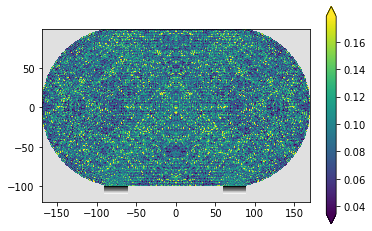

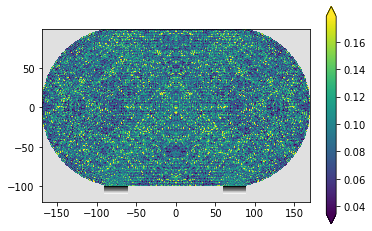

In [62]:
kwant.plotter.map(sys, local_dos, num_lead_cells=10, cmap= 'viridis')